In [1]:
#1. First class passengers survived more T
#2. Younger passengers survived more T
#3. Males survived more F
#4. Not alone passengers survived more T 
#5. Expensive ticket owners survived more T
#6. Passengers from part 'S' survived more F

In [1]:
import pandas as pd
df = pd.read_csv('titanic_cleaned.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [3]:
#1 True
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: title={'center': 'Survival rate: for each class'}, xlabel='Class of passenger', ylabel='Persentage of survived'>

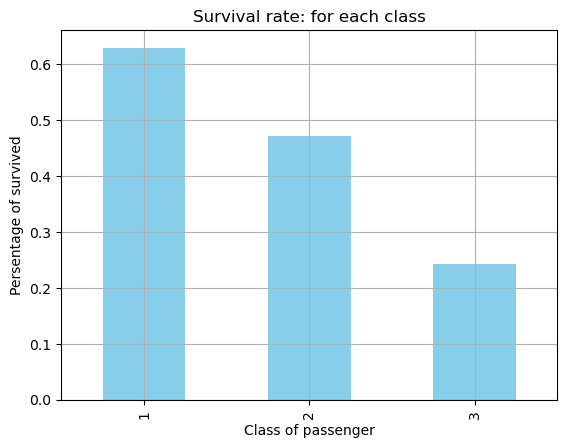

In [5]:
top_classes = df.groupby('Pclass').agg({'Survived': 'mean'})
top_classes.plot(
    kind='bar',
    title='Survival rate: for each class',
    grid=True,
    legend=False,
    ylabel='Persentage of survived',
    xlabel='Class of passenger',
    color='skyblue'
)

In [14]:
#2 True
young=df[df['Age']<=25]
middle=df[(df['Age'] > 25) & (df['Age'] <= 40)]
old=df[df['Age']>40]
print(young['Survived'].mean())
print(middle['Survived'].mean())
print(old['Survived'].mean())

0.43440233236151604
0.35278514588859416
0.3508771929824561


In [17]:
data = {
    'young (≤25)': young['Survived'].mean(),
    'middle (26–40)': middle['Survived'].mean(),
    'old (>40)': old['Survived'].mean()
}

<Axes: title={'center': 'Survival rate by age group'}, xlabel='Survival rate', ylabel='Age group'>

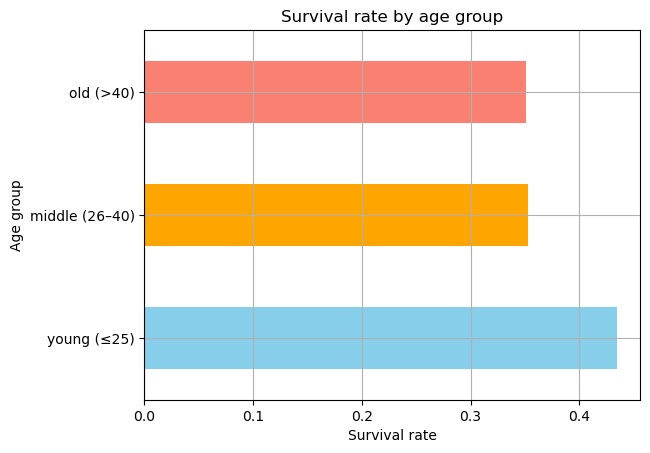

In [24]:
age_groups = pd.Series(data)
age_groups.plot(
    kind='barh',
    title='Survival rate by age group',
    ylabel='Age group',
    xlabel='Survival rate',
    color=['skyblue', 'orange', 'salmon'],
    grid=True,
    legend=False
)

In [19]:
#3 False
df.groupby('Sex')['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

<Axes: title={'center': 'Survival rate by gender'}, xlabel='Sex', ylabel='Survival rate'>

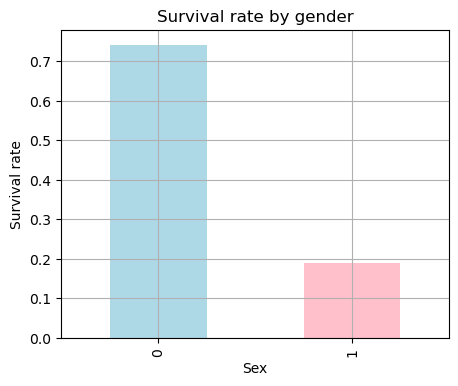

In [42]:
df.groupby('Sex')['Survived'].mean().plot(
    figsize=(5, 4),
    kind='bar',
    title='Survival rate by gender',
    ylabel='Survival rate',
    xlabel='Sex',
    color=['lightblue', 'pink'], 
    grid=True,
    legend=False
)

In [27]:
df['Not Alone'] = df['SibSp']+df['Parch']
df['Not Alone'].value_counts()

Not Alone
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [28]:
#4 True
alone = df[df['Not Alone'] == 0]
not_alone = df[df['Not Alone'] > 0]
print(alone['Survived'].mean())
print(not_alone['Survived'].mean())

0.30353817504655495
0.5056497175141242


<Axes: title={'center': 'Survival rate by type of trip'}, xlabel='Survival rate', ylabel='Type of trip'>

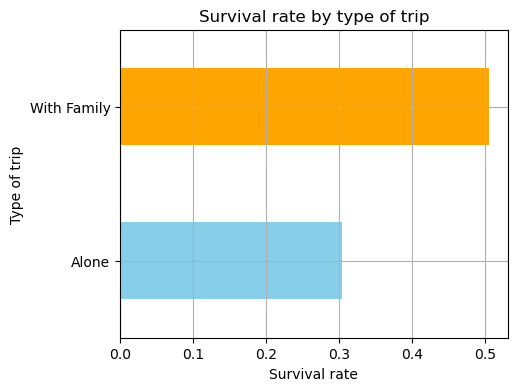

In [41]:
pd.Series({
    'Alone': alone['Survived'].mean(),
    'With Family': not_alone['Survived'].mean()
}).plot(
    figsize=(5, 4),
    kind='barh', 
    title='Survival rate by type of trip',
    xlabel='Survival rate',
    ylabel='Type of trip',
    color=['skyblue', 'orange'],
    grid=True,
    legend=False
)

In [31]:
#5 True
avg_fare = df['Fare'].mean()

cheap = df[df['Fare'] <= avg_fare]['Survived'].mean()
expensive = df[df['Fare'] > avg_fare]['Survived'].mean()

print(cheap)
print(expensive)

0.3176470588235294
0.5971563981042654


<Axes: title={'center': 'Chipta narxiga qarab omon qolish foizi'}, xlabel='Omon qolish foizi', ylabel='Chipta turi'>

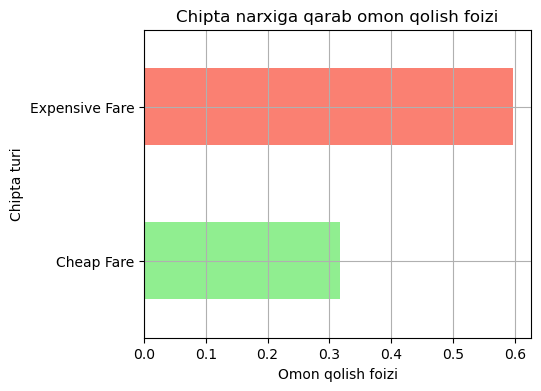

In [40]:
pd.Series({
    'Cheap Fare': cheap,
    'Expensive Fare': expensive
}).plot(
    figsize=(5, 4),
    kind='barh',
    title='Chipta narxiga qarab omon qolish foizi',
    xlabel='Omon qolish foizi',
    ylabel='Chipta turi',
    color=['lightgreen', 'salmon'],
    grid=True,
    legend=False
)

In [33]:
#6 False
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<Axes: title={'center': 'Embarked bo‘yicha omon qolish foizi'}, xlabel='Tushgan port (Embarked)', ylabel='Omon qolish foizi'>

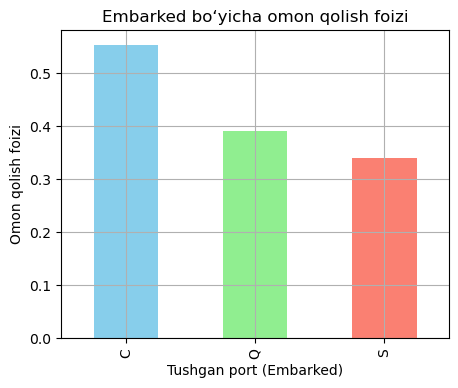

In [38]:
df.groupby('Embarked')['Survived'].mean().plot(
    figsize=(5, 4),
    kind='bar',
    title='Embarked bo‘yicha omon qolish foizi',
    ylabel='Omon qolish foizi',
    xlabel='Tushgan port (Embarked)',
    color=['skyblue', 'lightgreen', 'salmon'],
    grid=True,
    legend=False
)